## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
#load necessary modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import datasets, linear_model
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df_kc = pd.read_csv('data/kc_house_data.csv', index_col='id')

In [3]:
df_kc.drop(['date', 'yr_renovated','condition','zipcode','sqft_basement'],axis=1, inplace=True)

In [4]:
df_kc

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,7 Average,1180,1955,47.5112,-122.257,1340,5650
6414100192,538000.0,3,2.25,2570,7242,2.0,NO,NONE,7 Average,2170,1951,47.7210,-122.319,1690,7639
5631500400,180000.0,2,1.00,770,10000,1.0,NO,NONE,6 Low Average,770,1933,47.7379,-122.233,2720,8062
2487200875,604000.0,4,3.00,1960,5000,1.0,NO,NONE,7 Average,1050,1965,47.5208,-122.393,1360,5000
1954400510,510000.0,3,2.00,1680,8080,1.0,NO,NONE,8 Good,1680,1987,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,360000.0,3,2.50,1530,1131,3.0,NO,NONE,8 Good,1530,2009,47.6993,-122.346,1530,1509
6600060120,400000.0,4,2.50,2310,5813,2.0,NO,NONE,8 Good,2310,2014,47.5107,-122.362,1830,7200
1523300141,402101.0,2,0.75,1020,1350,2.0,NO,NONE,7 Average,1020,2009,47.5944,-122.299,1020,2007


In [5]:
df_kc=df_kc[df_kc['bedrooms']<=5]

In [6]:
df_kc

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,7 Average,1180,1955,47.5112,-122.257,1340,5650
6414100192,538000.0,3,2.25,2570,7242,2.0,NO,NONE,7 Average,2170,1951,47.7210,-122.319,1690,7639
5631500400,180000.0,2,1.00,770,10000,1.0,NO,NONE,6 Low Average,770,1933,47.7379,-122.233,2720,8062
2487200875,604000.0,4,3.00,1960,5000,1.0,NO,NONE,7 Average,1050,1965,47.5208,-122.393,1360,5000
1954400510,510000.0,3,2.00,1680,8080,1.0,NO,NONE,8 Good,1680,1987,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,360000.0,3,2.50,1530,1131,3.0,NO,NONE,8 Good,1530,2009,47.6993,-122.346,1530,1509
6600060120,400000.0,4,2.50,2310,5813,2.0,NO,NONE,8 Good,2310,2014,47.5107,-122.362,1830,7200
1523300141,402101.0,2,0.75,1020,1350,2.0,NO,NONE,7 Average,1020,2009,47.5944,-122.299,1020,2007


In [7]:
df_kc=df_kc[df_kc['bathrooms']<=4]

In [8]:
df_kc

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,7 Average,1180,1955,47.5112,-122.257,1340,5650
6414100192,538000.0,3,2.25,2570,7242,2.0,NO,NONE,7 Average,2170,1951,47.7210,-122.319,1690,7639
5631500400,180000.0,2,1.00,770,10000,1.0,NO,NONE,6 Low Average,770,1933,47.7379,-122.233,2720,8062
2487200875,604000.0,4,3.00,1960,5000,1.0,NO,NONE,7 Average,1050,1965,47.5208,-122.393,1360,5000
1954400510,510000.0,3,2.00,1680,8080,1.0,NO,NONE,8 Good,1680,1987,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,360000.0,3,2.50,1530,1131,3.0,NO,NONE,8 Good,1530,2009,47.6993,-122.346,1530,1509
6600060120,400000.0,4,2.50,2310,5813,2.0,NO,NONE,8 Good,2310,2014,47.5107,-122.362,1830,7200
1523300141,402101.0,2,0.75,1020,1350,2.0,NO,NONE,7 Average,1020,2009,47.5944,-122.299,1020,2007


In [9]:
df_kc['price'].sort_values(ascending=False)[:50]

id
3835500195    4490000.0
7397300170    3710000.0
4389201095    3650000.0
2425049063    3640000.0
4114601570    3600000.0
3126059023    3400000.0
1118000320    3400000.0
9808100150    3350000.0
3625059152    3300000.0
7524900003    3280000.0
8964800890    3200000.0
251500080     3200000.0
624069108     3200000.0
3025059124    3170000.0
333100295     3120000.0
4131900066    3100000.0
3760500116    3070000.0
1732800780    3070000.0
1925059254    3000000.0
8964800330    3000000.0
1118000340    3000000.0
518500480     3000000.0
9808100100    3000000.0
3625049014    2950000.0
6613000930    2950000.0
6447300365    2900000.0
7159200040    2900000.0
2624049091    2900000.0
7960900060    2900000.0
1118000301    2890000.0
2303900090    2880000.0
6065300840    2850000.0
1069000070    2800000.0
3859900060    2750000.0
7397300220    2750000.0
624069035     2750000.0
2525049086    2720000.0
8043700300    2700000.0
5442300807    2700000.0
2524069078    2700000.0
625059036     2700000.0
2525049263   

In [10]:
df_kc['waterfront'] = df_kc['waterfront'].fillna('NO')
df_kc['waterfront'] = df_kc['waterfront'].replace(["NO"], 0).replace(["YES"], 1)
df_kc['waterfront'] = df_kc['waterfront'].astype(int)
df_kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21061 entries, 7129300520 to 1523300157
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21061 non-null  float64
 1   bedrooms       21061 non-null  int64  
 2   bathrooms      21061 non-null  float64
 3   sqft_living    21061 non-null  int64  
 4   sqft_lot       21061 non-null  int64  
 5   floors         21061 non-null  float64
 6   waterfront     21061 non-null  int64  
 7   view           21002 non-null  object 
 8   grade          21061 non-null  object 
 9   sqft_above     21061 non-null  int64  
 10  yr_built       21061 non-null  int64  
 11  lat            21061 non-null  float64
 12  long           21061 non-null  float64
 13  sqft_living15  21061 non-null  int64  
 14  sqft_lot15     21061 non-null  int64  
dtypes: float64(5), int64(8), object(2)
memory usage: 2.6+ MB


<ipython-input-10-76c2ce14bf9c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kc['waterfront'] = df_kc['waterfront'].fillna('NO')
<ipython-input-10-76c2ce14bf9c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kc['waterfront'] = df_kc['waterfront'].replace(["NO"], 0).replace(["YES"], 1)
<ipython-input-10-76c2ce14bf9c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [11]:
df_kc['waterfront'].value_counts()

0    20934
1      127
Name: waterfront, dtype: int64

In [12]:
df_kc['view'].value_counts()

NONE         19039
AVERAGE        903
GOOD           466
FAIR           317
EXCELLENT      277
Name: view, dtype: int64

In [13]:
df_kc['view'] = df_kc['view'].replace(["NONE"], 0).replace(["FAIR"], 1).replace(["AVERAGE"], 2).replace(["GOOD"], 3).replace(["EXCELLENT"], 4)


<ipython-input-13-a5d6b6e2af0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kc['view'] = df_kc['view'].replace(["NONE"], 0).replace(["FAIR"], 1).replace(["AVERAGE"], 2).replace(["GOOD"], 3).replace(["EXCELLENT"], 4)


In [14]:
df_kc['view'].value_counts()

0.0    19039
2.0      903
3.0      466
1.0      317
4.0      277
Name: view, dtype: int64

In [15]:
df_kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21061 entries, 7129300520 to 1523300157
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21061 non-null  float64
 1   bedrooms       21061 non-null  int64  
 2   bathrooms      21061 non-null  float64
 3   sqft_living    21061 non-null  int64  
 4   sqft_lot       21061 non-null  int64  
 5   floors         21061 non-null  float64
 6   waterfront     21061 non-null  int64  
 7   view           21002 non-null  float64
 8   grade          21061 non-null  object 
 9   sqft_above     21061 non-null  int64  
 10  yr_built       21061 non-null  int64  
 11  lat            21061 non-null  float64
 12  long           21061 non-null  float64
 13  sqft_living15  21061 non-null  int64  
 14  sqft_lot15     21061 non-null  int64  
dtypes: float64(6), int64(8), object(1)
memory usage: 2.6+ MB


In [16]:
df_kc['grade'].value_counts()

7 Average        8846
8 Good           5948
9 Better         2556
6 Low Average    2030
10 Very Good     1043
11 Excellent      310
5 Fair            239
12 Luxury          57
4 Low              27
13 Mansion          4
3 Poor              1
Name: grade, dtype: int64

In [17]:
df_kc['grade']=df_kc.grade.str.split(expand=True)

<ipython-input-17-3e3be90d0a35>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kc['grade']=df_kc.grade.str.split(expand=True)


In [18]:
df_kc['grade']=df_kc['grade'].astype(int)

<ipython-input-18-3e550dca5918>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kc['grade']=df_kc['grade'].astype(int)


In [19]:
df_kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21061 entries, 7129300520 to 1523300157
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21061 non-null  float64
 1   bedrooms       21061 non-null  int64  
 2   bathrooms      21061 non-null  float64
 3   sqft_living    21061 non-null  int64  
 4   sqft_lot       21061 non-null  int64  
 5   floors         21061 non-null  float64
 6   waterfront     21061 non-null  int64  
 7   view           21002 non-null  float64
 8   grade          21061 non-null  int64  
 9   sqft_above     21061 non-null  int64  
 10  yr_built       21061 non-null  int64  
 11  lat            21061 non-null  float64
 12  long           21061 non-null  float64
 13  sqft_living15  21061 non-null  int64  
 14  sqft_lot15     21061 non-null  int64  
dtypes: float64(6), int64(9)
memory usage: 2.6 MB


### Checking Correlations

In [20]:
x_columns = ['bedrooms', 'waterfront', 'view', 'bathrooms','sqft_living','sqft_lot','floors','grade','sqft_above','yr_built', 'sqft_living15','sqft_lot15']

df_kc2 = df_kc[x_columns]
df_kc2['price'] = df_kc['price']
df_kc = df_kc2

<ipython-input-20-be82e3c2eb1c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kc2['price'] = df_kc['price']


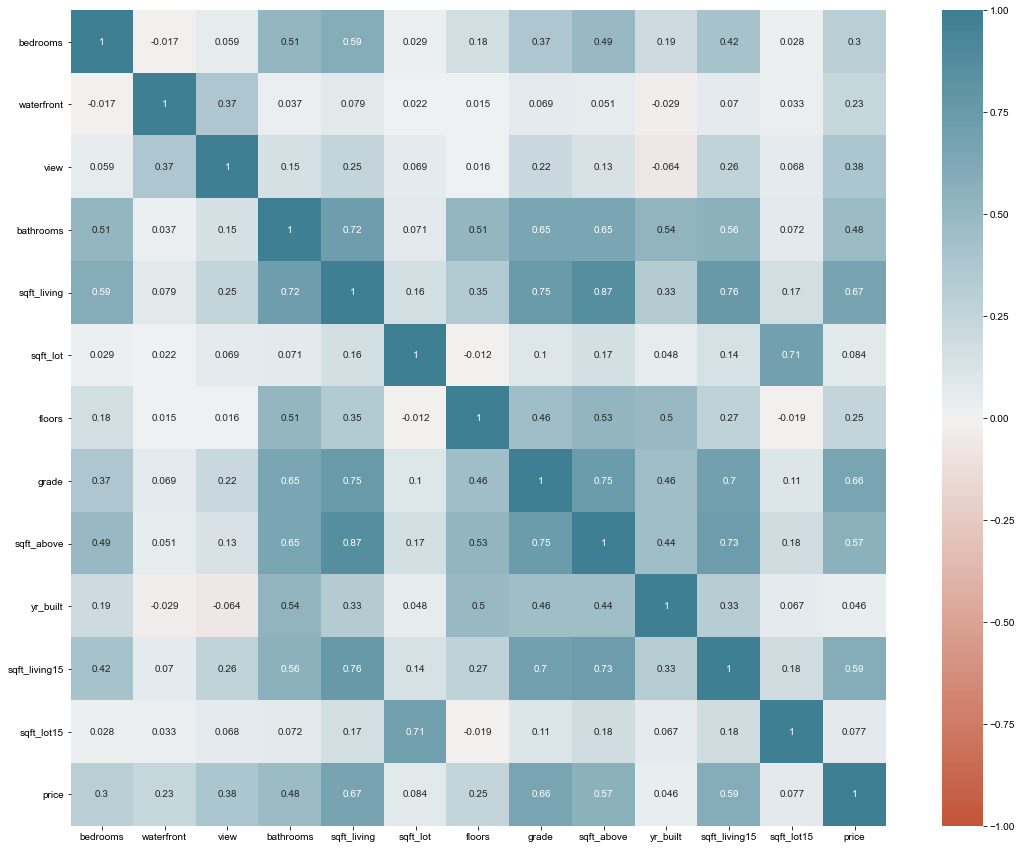

In [21]:
corr = df_kc.corr()
fig,ax=plt.subplots(figsize=(20,15))
sns.heatmap(corr, annot=True,
xticklabels = corr.columns.values,
yticklabels = corr.columns.values,
vmin = -1,
vmax = 1,
center = 0,
cmap = sns.diverging_palette(20, 220, n = 200),
square = True)
sns.set(font_scale=2)
plt.show()

In [22]:
features = []
correlations = []
for idx, correlation in corr['price'].T.iteritems():
    if correlation >= .30 and idx != 'price':
        features.append(idx)
        correlations.append(correlation)
corr_price_df = pd.DataFrame({'Correlations':correlations, 'Features': features}).sort_values(by=['Correlations'], ascending=False)

In [23]:
corr_price_df

,Correlations,Features
2,0.671091,sqft_living
3,0.664058,grade
5,0.591469,sqft_living15
4,0.569847,sqft_above
1,0.476202,bathrooms
0,0.378410,view


In [24]:
Multicollinear_Features = []
Multicollinear_Corr = []
def check_multicollinearity(feature):
    for idx, correlation in corr[feature].T.iteritems():
        if correlation >= .75 and idx != feature:
            Multicollinear_Features.append([feature, idx])
            Multicollinear_Corr.append(correlation)
            
for feature in corr:
    check_multicollinearity(feature)
MC_df = pd.DataFrame({'Correlations':Multicollinear_Corr, 'Features': Multicollinear_Features}).sort_values(by=['Correlations'], ascending=False)

In [25]:
MC_df

,Correlations,Features
1,0.866220,"[sqft_living, sqft_above]"
4,0.866220,"[sqft_above, sqft_living]"
2,0.763473,"[sqft_living, sqft_living15]"
5,0.763473,"[sqft_living15, sqft_living]"
0,0.754325,"[sqft_living, grade]"
3,0.754325,"[grade, sqft_living]"


In [27]:
#Create Pair Plot
#sns.pairplot(df_kc, vars = ['price','sqft_living', 'grade', 'sqft_living15', 'sqft_above', 'bathrooms']

SyntaxError: unexpected EOF while parsing (<ipython-input-27-6ae2db97804a>, line 2)

## Question 2

In [28]:
# Possible Variables
price = df_kc['price']
bath = df_kc['bathrooms']
bed = df_kc['bedrooms']
grade = df_kc['grade']
sqft_living15 = df_kc['sqft_living15']
floors = df_kc['floors']
sqft_living = df_kc['sqft_living']
sqft_above = df_kc['sqft_above']
waterfront = df_kc['waterfront']
view = df_kc['view']

price_log = np.log(df_kc['price'])
bath_log = np.log(df_kc['bathrooms'])
bed_log = np.log(df_kc['bedrooms'])
grade_log = np.log(df_kc['grade'])
sqft_living15_log = np.log(df_kc['sqft_living15'])
floors_log = np.log(df_kc['floors'])
sqft_living_log = np.log(df_kc['sqft_living'])
sqft_above_log = np.log(df_kc['sqft_above'])
waterfront_log = np.log(df_kc['waterfront'])
view_log = np.log(df_kc['view'])

/Users/jeff/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [29]:
def model_diagnostic(model, x, x_name, y):
    
    residuals = model.resid
    
    f = plt.figure()
    f, axes = plt.subplots(nrows = 1, ncols = 3, sharex=False, sharey = False, figsize=(65,20), squeeze=False)
    
    f.text(s="Model Diagnostic Summary", x=.40, y=1.15, fontsize=85, fontname='arial')
    f.text(s="r-Squared: {r}".format(r=round(model.rsquared, 2)), x=.40, y=1.05, fontsize=50, fontname='arial')
    f.text(s="p-value: {p}".format(p= model.f_pvalue), x=.53, y=1.05, fontsize=50, fontname='arial')
    
    f.text(s='Residuals Histogram', x=.45, y=.93, fontsize=55, fontname='arial')
    
    sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, ax=axes[0][0])    
    plt.show;
    
    f.text(s='QQ Plot', x=.20, y=.93, fontsize=55, fontname='arial')
    
    axes[0][1].hist(residuals)
    plt.show;
    
    sns.residplot(x, y, ax=axes[0][2])
 
    f.text(s='Residuals vs {x}'.format(x=x_name), x=.73, y=.93, fontsize=55, fontname='arial')
    plt.tight_layout;
    plt.show;

## Simple Linear Regressions